<a href="https://colab.research.google.com/github/Melina28072010/Predicting-Health-Risks-Stay-Healthy-Stay-Ahead/blob/main/4_Baseline_Trials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

 We import essential libraries for handling data (pandas, numpy), building baseline models (sklearn), and evaluating them using classification metrics.

In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, classification_report, mean_squared_error, r2_score)

**Load the dataset**

We load the preprocessed dataset that includes input features and a target variable (risk). This file should come from the data cleaning and EDA phase.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Milestone 3.2 Data/Datasets/heart_attack_prediction_dataset.csv')
data.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [ ]:
print("\nColumn types:")
print(data.dtypes)

print("\nObject columns (potential issues):")
print(data.select_dtypes(include='object').columns)


Column types:
Patient ID                          object
Age                                  int64
Sex                                 object
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                object
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             obj

**Drop Irrelevant Columns**

Dropping columns like Patient Id , Country, Continent, and Hemisphere as they are not useful predictions.

In [ ]:
data = data.drop(columns=['Patient ID', 'Country', 'Continent', 'Hemisphere'])

**Encode Categorical Features**

We convert text columns into numbers using one-hot encoding so the models can understand them.

In [ ]:
data_encoded = pd.get_dummies(data, drop_first=True)

**Define features and target**

In [ ]:
X = data_encoded.drop(columns=['Heart Attack Risk'])
y = data_encoded['Heart Attack Risk']

We check for any remaining non-numeric columns

In [ ]:
non_numeric = data_encoded.select_dtypes(include='object').columns
if len(non_numeric) > 0:
    print("Still non-numeric:", non_numeric)
else:
    print("All columns are numeric.")


All columns are numeric.


**Define Features and Target**

We define X as all input features (e.g., age, exercise, smoking) and y as the target label — whether the person is at health risk.

In [ ]:
X = data_encoded.drop(columns=['Heart Attack Risk'])
y = data_encoded['Heart Attack Risk']

**Split Data into Train and Test Tests**

We split the data to evaluate how well our models generalize to unseen data. 80% is used for training and 20% for testing.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Logistic Regression**

Logistic regression is a simple but strong baseline for binary classification. It's especially common in health risk prediction problems.

In [ ]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
log_preds = log_reg.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Train Baseline Models**

The **dummy classifier** sets a baseline by always predicting the most common class. It's used to ensure our real models are actually learning.

In [ ]:
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
dummy_preds = dummy.predict(X_test)

**K-Nearest Neighbours (KNN)**

kNN is a non-parametric model that uses distance between points to classify. It’s useful for capturing non-linear relationships.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)

**Define Evaluation Function**

This function prints the confusion matrix, precision, recall, F1-score, and accuracy for each model — all important metrics for classification performance.

In [ ]:
  def evaluate_model(name, y_true, y_pred):
 print(f"\n{name} Evaluation")
 print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
 print("Classification Report:\n", classification_report(y_true, y_pred))
 print(f"R² Score: {r2_score(y_true, y_pred):.4f}")
 print(f"MSE: {mean_squared_error(y_true, y_pred):.4f}")
 print("-" * 50)

**Evaluate for all Models**

Now we compare the models' performance on the test set. This helps us identify which baseline performs best and why.

In [ ]:
evaluate_model("Dummy Classifier", y_test, dummy_preds)
evaluate_model("Logistic Regression", y_test, log_preds)
evaluate_model("kNN Classifier", y_test, knn_preds)


Dummy Classifier Evaluation
Confusion Matrix:
 [[1125    0]
 [ 628    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      1.00      0.78      1125
           1       0.00      0.00      0.00       628

    accuracy                           0.64      1753
   macro avg       0.32      0.50      0.39      1753
weighted avg       0.41      0.64      0.50      1753

R² Score: -0.5582
MSE: 0.3582
--------------------------------------------------

Logistic Regression Evaluation
Confusion Matrix:
 [[1125    0]
 [ 628    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      1.00      0.78      1125
           1       0.00      0.00      0.00       628

    accuracy                           0.64      1753
   macro avg       0.32      0.50      0.39      1753
weighted avg       0.41      0.64      0.50      1753

R² Score: -0.5582
MSE: 0.3582
----------------------------------

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

**Regression Metrics (R2 and MSE)**

We use R2 and MSE to get extra insights on prediction quality, even for classification tasks.

In [ ]:
def print_regression_metrics(name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    print(f"{name} - R² Score: {r2:.2f}, MSE: {mse:.2f}")

print_regression_metrics("Dummy Classifier", y_test, dummy_preds)
print_regression_metrics("Logistic Regression", y_test, log_preds)
print_regression_metrics("KNN Classifier", y_test, knn_preds)

Dummy Classifier - R² Score: -0.56, MSE: 0.36
Logistic Regression - R² Score: -0.56, MSE: 0.36
KNN Classifier - R² Score: -0.90, MSE: 0.44


**Confusion Matrix Heatmaps**

These heatmaps show the number of correct and incorrect predictions for each class. Darker blues indicate higher counts. They help visualize where each model makes mistakes.

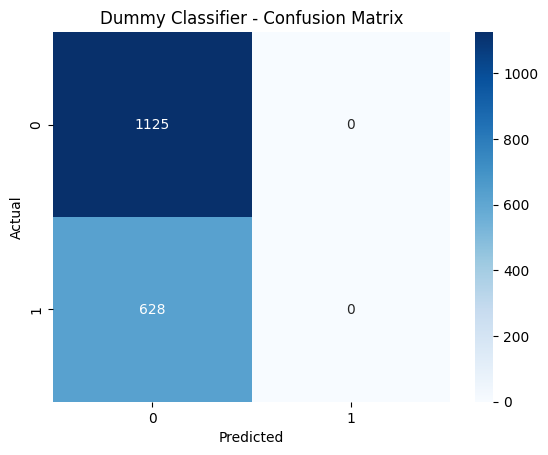

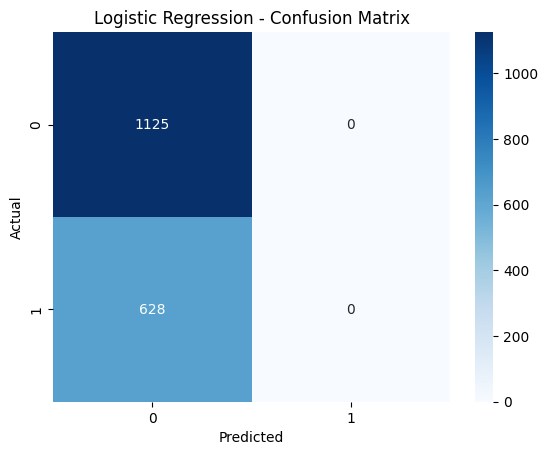

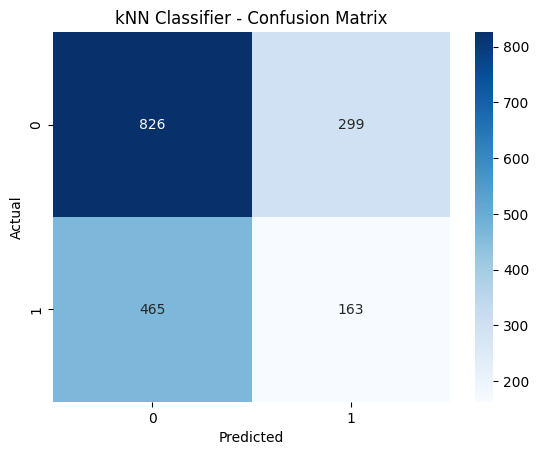

In [115]:
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{title} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


plot_conf_matrix(y_test, dummy_preds, "Dummy Classifier")
plot_conf_matrix(y_test, log_preds, "Logistic Regression")
plot_conf_matrix(y_test, knn_preds, "kNN Classifier")

**Bar Chart of Model Metrics**

This bar chart compares the performance of each model (Dummy, Logistic Regression, kNN) across key metrics: Accuracy, Precision, Recall, and F1 Score. It quickly highlights which model performs best overall.


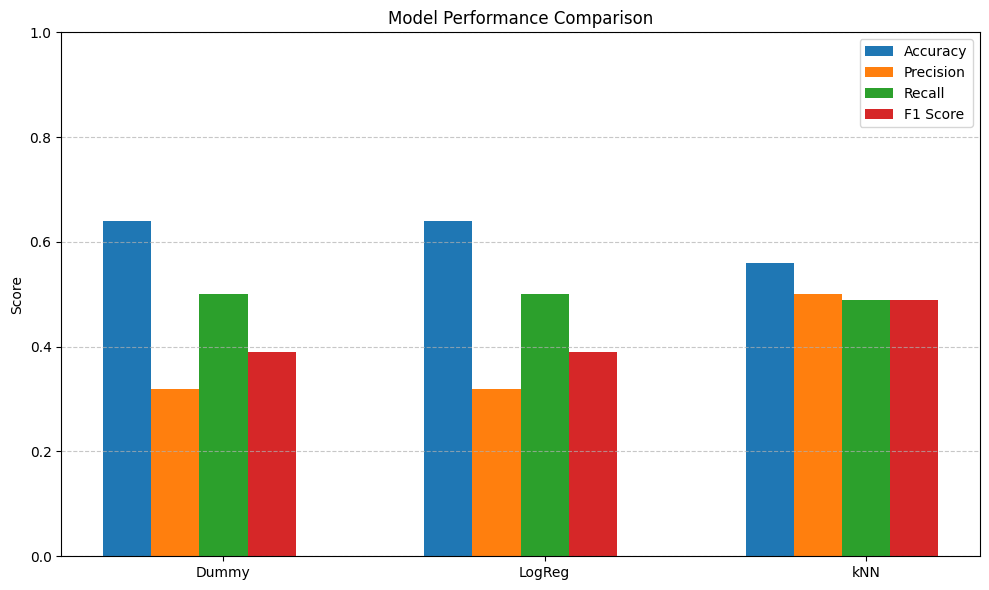

Dummy R² Score: -0.5582, MSE: 0.3582
LogReg R² Score: -0.5582, MSE: 0.3582
kNN R² Score: -0.8957, MSE: 0.4358


In [117]:
models = ['Dummy', 'LogReg', 'kNN']

accuracy = [0.64, 0.64, 0.56]
precision = [0.32, 0.32, 0.50]
recall = [0.50, 0.50, 0.49]
f1 = [0.39, 0.39, 0.49]
r2 = [-0.5582, -0.5582, -0.8957]
mse = [0.3582, 0.3582, 0.4358]

x = np.arange(len(models))
width = 0.15

plt.figure(figsize=(10,6))
plt.bar(x - 2*width, accuracy, width, label='Accuracy')
plt.bar(x - width, precision, width, label='Precision')
plt.bar(x, recall, width, label='Recall')
plt.bar(x + width, f1, width, label='F1 Score')

plt.xticks(x, models)
plt.ylabel("Score")
plt.ylim(0, 1)
plt.title("Model Performance Comparison")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

for i, model in enumerate(models):
    print(f"{model} R² Score: {r2[i]:.4f}, MSE: {mse[i]:.4f}")